In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# This is new
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

#### Read and pre-process data

In [2]:
# fetch data 

main_data = pd.read_csv('Datasets/Stars.csv')
main_data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.00,0.17,16.12,Red,M,0
1,3042,0.00,0.15,16.60,Red,M,0
2,2600,0.00,0.10,18.70,Red,M,0
3,2800,0.00,0.16,16.65,Red,M,0
4,1939,0.00,0.10,20.06,Red,M,0


In [3]:
main_data.dtypes

Temperature         int64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type                int64
dtype: object

In [4]:
coded_data = pd.get_dummies(main_data, drop_first = True)
coded_data.head()

,Temperature,L,R,A_M,Type,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,...,Color_Yellowish White,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.00,0.17,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.00,0.15,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.00,0.10,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.00,0.16,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.00,0.10,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
len(coded_data)
set(coded_data['Type'])

240

{0, 1, 2, 3, 4, 5}

Text(0.5, 0, 'Temperature')

Text(0, 0.5, 'Type')

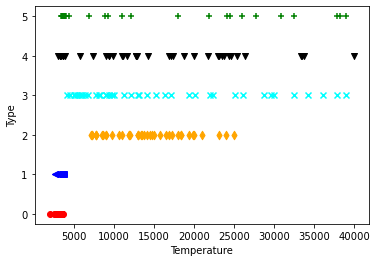

Text(0.5, 0, 'L')

Text(0, 0.5, 'Type')

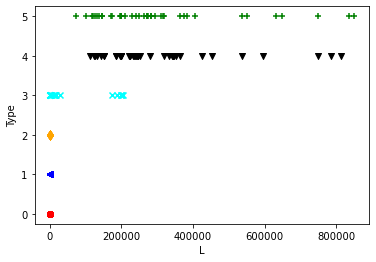

Text(0.5, 0, 'R')

Text(0, 0.5, 'Type')

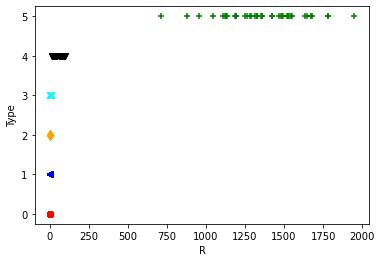

Text(0.5, 0, 'A_M')

Text(0, 0.5, 'Type')

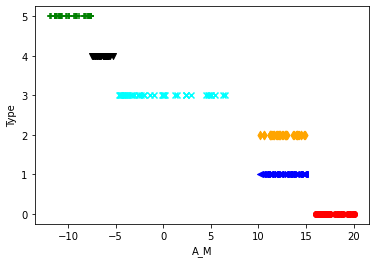

Text(0.5, 0, 'Color_Blue White')

Text(0, 0.5, 'Type')

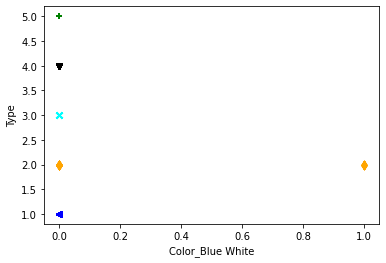

Text(0.5, 0, 'Color_Blue white')

Text(0, 0.5, 'Type')

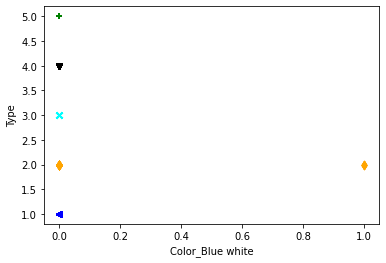

Text(0.5, 0, 'Color_Blue-White')

Text(0, 0.5, 'Type')

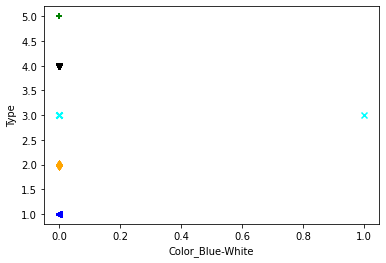

Text(0.5, 0, 'Color_Blue-white')

Text(0, 0.5, 'Type')

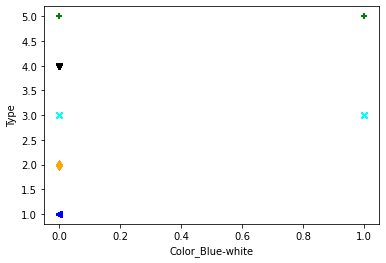

Text(0.5, 0, 'Color_Orange')

Text(0, 0.5, 'Type')

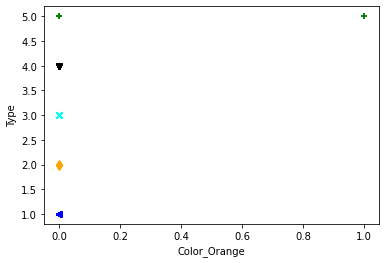

Text(0.5, 0, 'Color_Orange-Red')

Text(0, 0.5, 'Type')

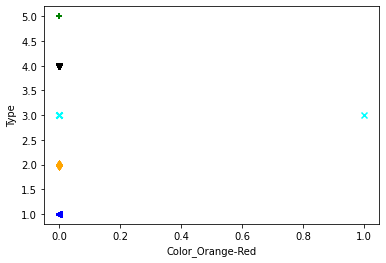

Text(0.5, 0, 'Color_Pale yellow orange')

Text(0, 0.5, 'Type')

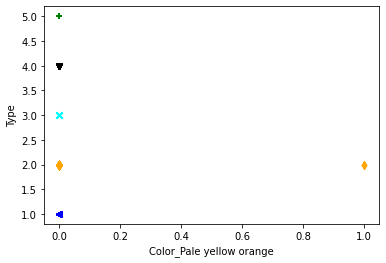

Text(0.5, 0, 'Color_Red')

Text(0, 0.5, 'Type')

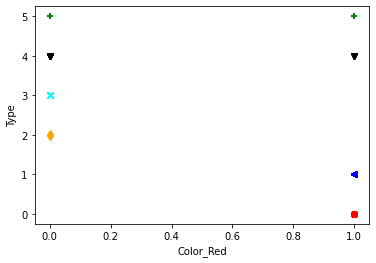

Text(0.5, 0, 'Color_White')

Text(0, 0.5, 'Type')

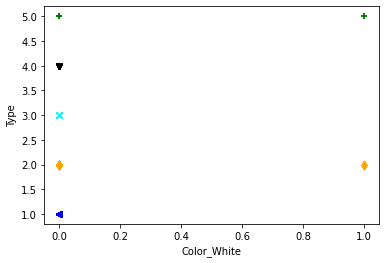

Text(0.5, 0, 'Color_White-Yellow')

Text(0, 0.5, 'Type')

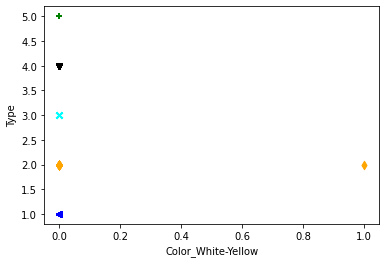

Text(0.5, 0, 'Color_Whitish')

Text(0, 0.5, 'Type')

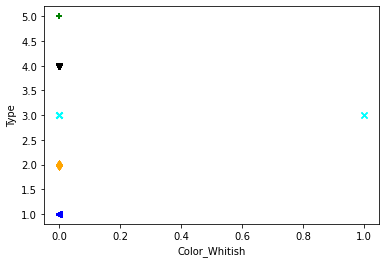

Text(0.5, 0, 'Color_Yellowish')

Text(0, 0.5, 'Type')

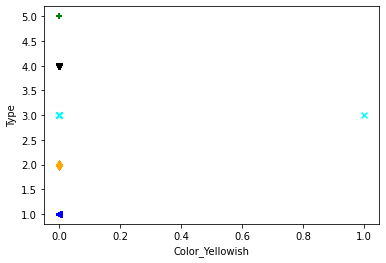

Text(0.5, 0, 'Color_Yellowish White')

Text(0, 0.5, 'Type')

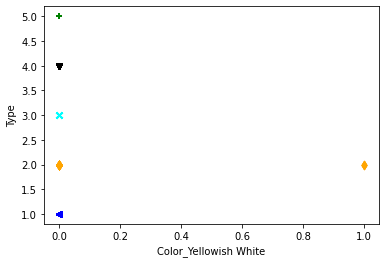

Text(0.5, 0, 'Color_white')

Text(0, 0.5, 'Type')

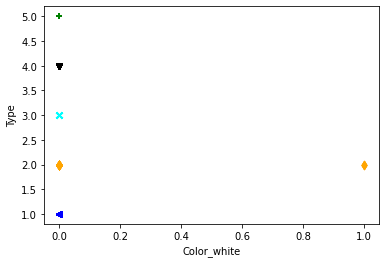

Text(0.5, 0, 'Color_yellow-white')

Text(0, 0.5, 'Type')

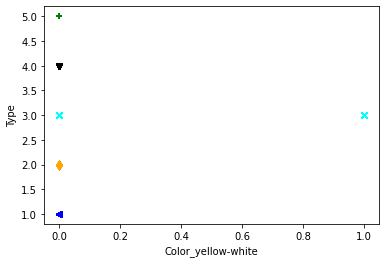

Text(0.5, 0, 'Color_yellowish')

Text(0, 0.5, 'Type')

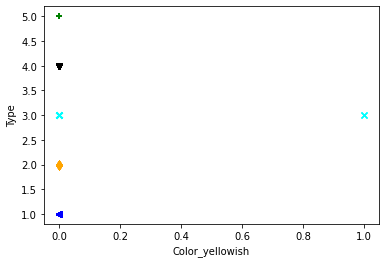

Text(0.5, 0, 'Spectral_Class_B')

Text(0, 0.5, 'Type')

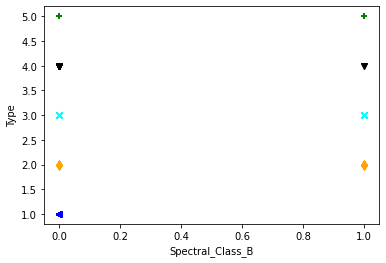

Text(0.5, 0, 'Spectral_Class_F')

Text(0, 0.5, 'Type')

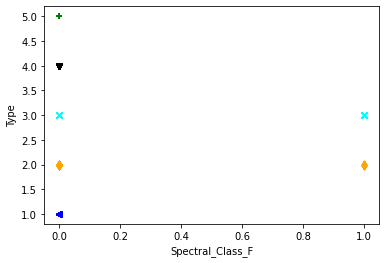

Text(0.5, 0, 'Spectral_Class_G')

Text(0, 0.5, 'Type')

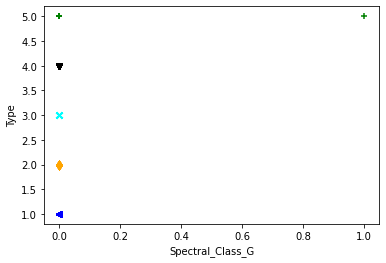

Text(0.5, 0, 'Spectral_Class_K')

Text(0, 0.5, 'Type')

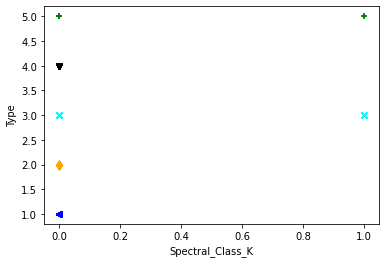

Text(0.5, 0, 'Spectral_Class_M')

Text(0, 0.5, 'Type')

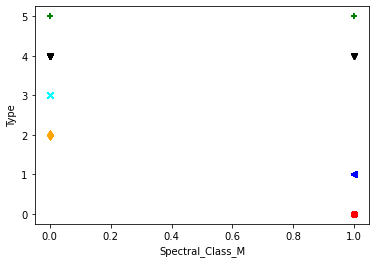

Text(0.5, 0, 'Spectral_Class_O')

Text(0, 0.5, 'Type')

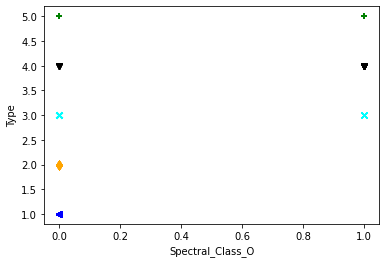

In [6]:
X0 = coded_data[coded_data['Type'] == 0]
X1 = coded_data[coded_data['Type'] == 1]
X2 = coded_data[coded_data['Type'] == 2]
X3 = coded_data[coded_data['Type'] == 3]
X4 = coded_data[coded_data['Type'] == 4]
X5 = coded_data[coded_data['Type'] == 5]

for col in coded_data.drop(columns=['Type']).columns: 
    plt.scatter(X0[col], X0['Type'], color = 'red', marker = 'o', label = 'Type 0')
    plt.scatter(X1[col], X1['Type'], color = 'blue', marker = '<', label = 'Type 1')
    plt.scatter(X2[col], X2['Type'], color = 'orange', marker = 'd', label = 'Type 2')
    plt.scatter(X3[col], X3['Type'], color = 'cyan', marker = 'x', label = 'Type 3')
    plt.scatter(X4[col], X4['Type'], color = 'black', marker = 'v', label = 'Type 4')
    plt.scatter(X5[col], X5['Type'], color = 'green', marker = '+', label = 'Type 5')
    plt.xlabel(col)
    plt.ylabel('Type')
    # plt.legend(loc='center right')
    plt.show()

In [7]:
# admission_data.isna().sum()
coded_data.isna().sum()

Temperature                 0
L                           0
R                           0
A_M                         0
Type                        0
Color_Blue White            0
Color_Blue white            0
Color_Blue-White            0
Color_Blue-white            0
Color_Orange                0
Color_Orange-Red            0
Color_Pale yellow orange    0
Color_Red                   0
Color_White                 0
Color_White-Yellow          0
Color_Whitish               0
Color_Yellowish             0
Color_Yellowish White       0
Color_white                 0
Color_yellow-white          0
Color_yellowish             0
Spectral_Class_B            0
Spectral_Class_F            0
Spectral_Class_G            0
Spectral_Class_K            0
Spectral_Class_M            0
Spectral_Class_O            0
dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(coded_data.drop(columns = ['Type']), coded_data['Type'], test_size=0.2, stratify = coded_data['Type'], random_state=50)
# In the above split the stratify = y essentially makes sure the fractions of the classification is maintained
X_train
X_test
y_train
y_test

,Temperature,L,R,A_M,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,Color_Orange-Red,...,Color_Yellowish White,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
76,2890,0.00,0.24,13.46,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
121,3531,0.00,0.10,19.94,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
165,7282,"131,000.00",24.00,-7.22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
98,12098,689.00,7.01,0.02,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
227,10930,"783,930.00",25.00,-6.22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,8250,9.25,1.93,-0.98,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
170,3570,"320,000.00","1,480.00",-7.58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
158,13023,998.00,6.21,-1.38,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
134,3542,0.00,0.62,14.23,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


,Temperature,L,R,A_M,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,Color_Orange-Red,...,Color_Yellowish White,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
140,13420,0.00,0.01,13.67,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
91,4526,0.15,0.86,6.51,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
89,19860,0.00,0.01,11.34,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
197,3496,0.00,0.34,14.94,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
211,10012,552.00,5.86,0.01,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
202,14982,0.00,0.01,12.23,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
190,3462,0.01,0.15,11.47,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
175,3614,"145,000.00","1,553.00",-7.71,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
106,24630,"363,000.00",63.00,-5.83,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24,16500,0.01,0.01,11.89,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


76     1
121    0
165    4
98     3
227    4
      ..
219    3
170    5
158    3
134    1
114    5
Name: Type, Length: 192, dtype: int64

140    2
91     3
89     2
197    1
211    3
202    2
190    1
175    5
106    4
24     2
239    5
176    5
101    4
95     3
70     1
162    4
6      0
180    0
182    0
84     2
210    3
184    0
183    0
228    4
196    1
44     4
169    4
152    3
61     0
173    5
122    0
57     5
232    5
142    2
12     1
104    4
4      0
94     3
111    5
206    2
200    2
139    1
236    5
36     3
166    4
71     1
30     3
10     1
Name: Type, dtype: int64

In [9]:
model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'none')
#model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'none', max_iter = 1000)
# model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'multinomial', penalty = 'none', max_iter = 1000)
# model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'multinomial', penalty = 'none', max_iter = 1000)

# While using multiclass case do multi_class = 'ovr' or 'auto'; can also try other solvers
# While doing regularization, use penalty = 'l2' and also C = 10.0 (need to try other values too)

model.fit(X_train, y_train) 

# The following gives the mean accuracy on the given data and labels
model.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7
model.coef_

# This is the coefficient Beta_0
model.intercept_

/Users/shanghuahao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr', penalty='none')

1.0

array([[-1.01435133e-01, -1.95193834e+00, -1.79515280e+02,
         6.62018028e+01, -4.66810715e-02, -5.00988468e-02,
        -1.46501902e-02, -1.49443351e-02,  2.76920802e-07,
        -3.74776619e-02, -2.44282488e-02, -2.27841005e+02,
        -9.83311310e-02, -2.52865877e-02, -3.06103598e-02,
        -3.84825144e-02, -3.72681923e-02, -2.65473498e-02,
        -2.04094458e-01, -4.56810738e-02, -7.58607524e-02,
        -3.36861570e-01,  1.38460401e-07, -1.21640973e-01,
        -2.27841005e+02,  3.87689123e-06],
       [-6.81939820e-02, -3.81873700e+02,  1.21573679e+02,
        -2.97579920e+01, -7.59508372e+00, -9.20568423e+00,
        -1.82315745e+00, -1.83469419e+00, -2.81533754e-06,
        -6.68461011e+00, -4.93767827e+00,  2.51170565e+02,
        -1.93684098e+01, -5.09671873e+00, -4.11364832e+00,
        -6.91330186e+00, -6.85822484e+00, -4.63058158e+00,
        -3.42702024e+01, -8.64626145e+00, -1.06583697e+01,
        -5.95282844e+01, -1.40766877e-06, -2.22441762e+01,
         2.51

array([-2.28552926e+02,  1.27043148e+02, -1.18048174e+01,  2.27591829e+00,
       -1.50614540e+00, -3.86897240e-04])

In [10]:
test_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_Type'])
test_output.head()

,pred_Type
140,2
91,3
89,2
197,1
211,3


In [11]:
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
print('Percentage of correct predictions is ')
print(model.score(X_test, y_test))

,pred_Type,Type
140,2,2
91,3,3
89,2,2
197,1,1
211,3,3


Percentage of correct predictions is 
1.0


In [12]:
test_output = test_output.merge(X_test, left_index = True, right_index = True)
test_output.head()

,pred_Type,Type,Temperature,L,R,A_M,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,...,Color_Yellowish White,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
140,2,2,13420,0.00,0.01,13.67,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
91,3,3,4526,0.15,0.86,6.51,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
89,2,2,19860,0.00,0.01,11.34,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
197,1,1,3496,0.00,0.34,14.94,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
211,3,3,10012,552.00,5.86,0.01,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
model.predict_proba(coded_data.drop(columns = ['Type']))

array([[9.99999968e-001, 5.27971364e-018, 5.79314083e-035,
        3.21894240e-008, 1.68016297e-252, 1.17762375e-011],
       [9.99999982e-001, 5.89017509e-024, 4.95101390e-036,
        1.75432422e-008, 1.87738034e-259, 1.44525847e-011],
       [9.99999998e-001, 9.94846150e-041, 1.98297880e-043,
        1.00471222e-009, 1.48935883e-288, 5.21970970e-010],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.24130950e-061, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 3.13121382e-020, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 1.00000000e+000]])

In [14]:
pd.DataFrame(model.predict_proba(coded_data.drop(columns = ['Type'])), columns = [0, 1, 2, 3, 4, 5])

,0,1,2,3,4,5
0,1.00,0.00,0.00,0.00,0.00,0.00
1,1.00,0.00,0.00,0.00,0.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00
3,1.00,0.00,0.00,0.00,0.00,0.00
4,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...
235,0.00,0.00,0.00,0.00,0.00,1.00
236,0.00,0.00,0.00,0.00,0.00,1.00
237,0.00,0.00,0.00,0.00,0.00,1.00
238,0.00,0.00,0.00,0.00,0.00,1.00


In [15]:
pd.DataFrame(model.predict_proba(coded_data.drop(columns = ['Type'])), columns = [0, 1, 2, 3, 4, 5]).max(axis = 1)
pd.DataFrame(model.predict_proba(coded_data.drop(columns = ['Type'])), columns = [0, 1, 2, 3, 4, 5]).idxmax(axis = 1)

0     1.00
1     1.00
2     1.00
3     1.00
4     1.00
      ... 
235   1.00
236   1.00
237   1.00
238   1.00
239   1.00
Length: 240, dtype: float64

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Length: 240, dtype: int64

In [16]:
data_with_prob = X_train.copy()
data_with_prob['Type'] = y_train
# Next we give the probability of predicting 1 (in multiclass, there will be probabilities by class)
data_with_prob['Probability'] = model.predict_proba(data_with_prob.drop(columns = ['Type'])).max(axis = 1)

# Notice that we are changing the probability to the one that was predicted
# data_with_prob['Probability'] = model.predict_proba(data_with_prob.drop(columns = ['Type']))[:,1]

data_with_prob.head()

,Temperature,L,R,A_M,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,Color_Orange-Red,...,Color_yellow-white,Color_yellowish,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,Type,Probability
76,2890,0.00,0.24,13.46,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1.00
121,3531,0.00,0.10,19.94,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.00
165,7282,"131,000.00",24.00,-7.22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,1.00
98,12098,689.00,7.01,0.02,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,3,1.00
227,10930,"783,930.00",25.00,-6.22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,1.00


In [17]:
test_output['Probability'] = model.predict_proba(test_output.drop(columns = ['Type', 'pred_Type'])).max(axis = 1)
# Sane as abive here too
# test_output['Probability'] = model.predict_proba(test_output.drop(columns = ['Type', 'pred_Type']))[:,1]

test_output.head()

,pred_Type,Type,Temperature,L,R,A_M,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,...,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,Probability
140,2,2,13420,0.00,0.01,13.67,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1.00
91,3,3,4526,0.15,0.86,6.51,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1.00
89,2,2,19860,0.00,0.01,11.34,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.94
197,1,1,3496,0.00,0.34,14.94,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.93
211,3,3,10012,552.00,5.86,0.01,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.00
